# 0. Imports

In [83]:
import pandas as pd

from sklearn import model_selection as ms
from sklearn import metrics as mt
from sklearn import ensemble as en
from sklearn import dummy as dm

In [69]:
df_raw = pd.read_csv( 'dataset/train_users_2.csv')
df_raw.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


# 1.0. Data Descriptive

In [70]:
# X_train and y_train
X_train = df_raw.drop('country_destination', axis=1)
y_train = df_raw['country_destination']

# split data into train and test
X_train, X_test, y_train, y_test = ms.train_test_split(
    X_train, 
    y_train,
    stratify=y_train,
    
    test_size=0.2 )


df1 = pd.concat( [X_train, y_train], axis=1 )

In [71]:
df1 = df1.dropna()

# 2.0. Features Engineering

# 3.0. Data Filtering

In [72]:
cols_to_drop = [
    'id',
    'date_account_created',
    'date_first_booking',
    'timestamp_first_active'
]

# drop columns
df1 = df1.drop( cols_to_drop, axis=1 )
df1.head()

,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
181335,FEMALE,35.0,facebook,0,en,sem-brand,google,omg,Web,Mac Desktop,Firefox,US
32671,FEMALE,40.0,basic,3,en,content,google,omg,Web,Mac Desktop,Firefox,US
11340,FEMALE,28.0,facebook,2,en,direct,direct,untracked,Web,iPhone,-unknown-,ES
36922,MALE,55.0,facebook,0,en,direct,direct,untracked,Web,Windows Desktop,IE,US
34826,FEMALE,29.0,facebook,3,en,direct,direct,untracked,Web,Mac Desktop,Firefox,US


# 4.0. Exploratory Data Analysis

<Axes: xlabel='country_destination'>

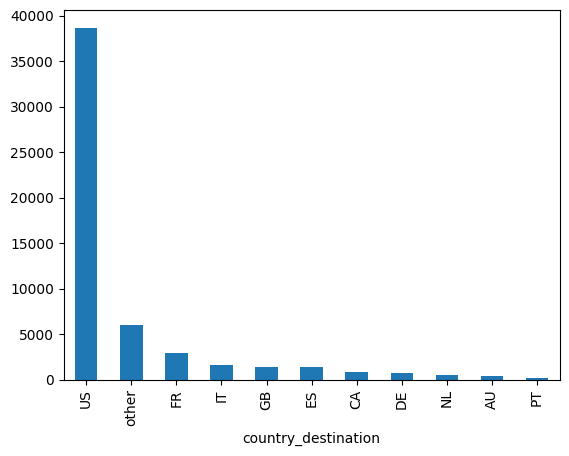

In [86]:
# grafico de barras mostrando a distribuicao de usuarios por pais
df1['country_destination'].value_counts().plot( kind='bar' )

# 5.0. Data Preparation

In [73]:
X_tr = df1.drop('country_destination', axis=1)
y_tr = df1['country_destination']

## 5.1. Normalization

## 5.2. Scaling

## 5.3. Encoder

In [74]:
# Frequency Encoder
for col in X_tr.select_dtypes( include=['object'] ).columns:
    freq = X_tr[col].value_counts().to_dict()
    X_tr[col] = X_tr[col].map( freq )

In [75]:
X_tr.head()

,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
181335,23873,35.0,18486,0,53167,6873,12535,10097,48889,27185,9739
32671,23873,40.0,36017,3,53167,323,12535,10097,48889,27185,9739
11340,23873,28.0,18486,2,53167,36614,36534,29953,48889,4157,3801
36922,20932,55.0,18486,0,53167,36614,36534,29953,48889,18233,4303
34826,23873,29.0,18486,3,53167,36614,36534,29953,48889,27185,9739


## 5.4. Transformation

# 6.0. Feature Selection

# 7.0. Machine Learning Modeling

## 7.1. Random Classifier

In [ ]:
# Training Dummy Classifier

# definition
dummy_model = dm.DummyClassifier( strategy='most_frequent' )

# train
dummy_model.fit( X_tr, y_tr )

# prediction
y_pred_tr = dummy_model.predict( X_tr )

# performance
dummy_acc_tr = mt.accuracy_score( y_tr, y_pred_tr ) 
dummy_f1_score = mt.f1_score( y_tr, y_pred_tr, average='macro' )

print( 'Accuracy: ', dummy_acc_tr )
print( 'F1 Score: ', dummy_f1_score )

Accuracy:  0.709380096384659
F1 Score:  0.07545320061667637


# 7.1. Random Forest Classifier

In [84]:
# model definition
model_rf = en.RandomForestClassifier( n_estimators=100, random_state=42, n_jobs=-1 )

# training
model_rf.fit( X_tr, y_tr )

# prediction
y_pred_tr = model_rf.predict( X_tr )

# performance
model_rf_acc_tr = mt.accuracy_score( y_tr, y_pred_tr ) 
model_rf_f1_score = mt.f1_score( y_tr, y_pred_tr, average='macro' )

print( 'Accuracy: ', model_rf_acc_tr )
print( 'F1 Score: ', model_rf_f1_score )

Accuracy:  0.8041155882945779
F1 Score:  0.5288510767739988


# 8.0. Hyperparameter Fine Tuning

# 9.0. Performance Metrics

# 10.0. Deploy to Production